In [1]:
library(tidyverse)
library(clusterProfiler)
library(WGCNA)
library(parallel)
library(pheatmap)
library(RColorBrewer)
library(ggplotify)
library(grid)

# Custom package
library(rutils)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



clusterProfiler v3.18.0  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: 'clusterProfiler'


The following object is masked from 'package:purrr':

    simplify


The following object is masked from 'package:stats':

    filter


L

In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
matrisome_path <- paste0(dirs$data_dir, "/matrisome/matrisome_hs_masterlist.tsv")

event_code <- list("Alive" = 0, "Dead" = 1)

In [3]:
dset_idx <- 1

In [4]:
lnames <- load(file = paste0(dirs$data_dir, "/saved_network_objects/", unified_dsets[dset_idx], "_tumor_data.RData"))
lnames <- load(file = paste0(dirs$data_dir, "/saved_network_objects/", unified_dsets[dset_idx], "_tumor_network.RData"))

In [5]:
text_size <- 11
guide_size <- 1
family <- "arial"
dpi <- 320
hm_ht <- 5
hm_wd <- 5

In [6]:
module_annot <- tibble(module_colors) %>%
    mutate(geneID = colnames(data_expr)) %>%
    column_to_rownames("geneID")

module_annot_colors <- list("module_colors" = unique(module_colors))
names(module_annot_colors[["module_colors"]]) <- unique(module_colors)

break_list <- seq(0, 0.35, by = 0.005)
pal <- colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(length(break_list))
# pal <- colorRampPalette(rev(brewer.pal(n = 7, name = "RdBu")))(length(break_list))

hm_breaks = c(0, 0.1, 0.2, 0.3)
hm_labels = c("0", "0.1", "0.2", "0.3")

In [7]:
tom_hm <- tom - diag(1, nrow(tom), nrow(tom))
rownames(tom_hm) <- colnames(data_expr)
colnames(tom_hm) <- colnames(data_expr)

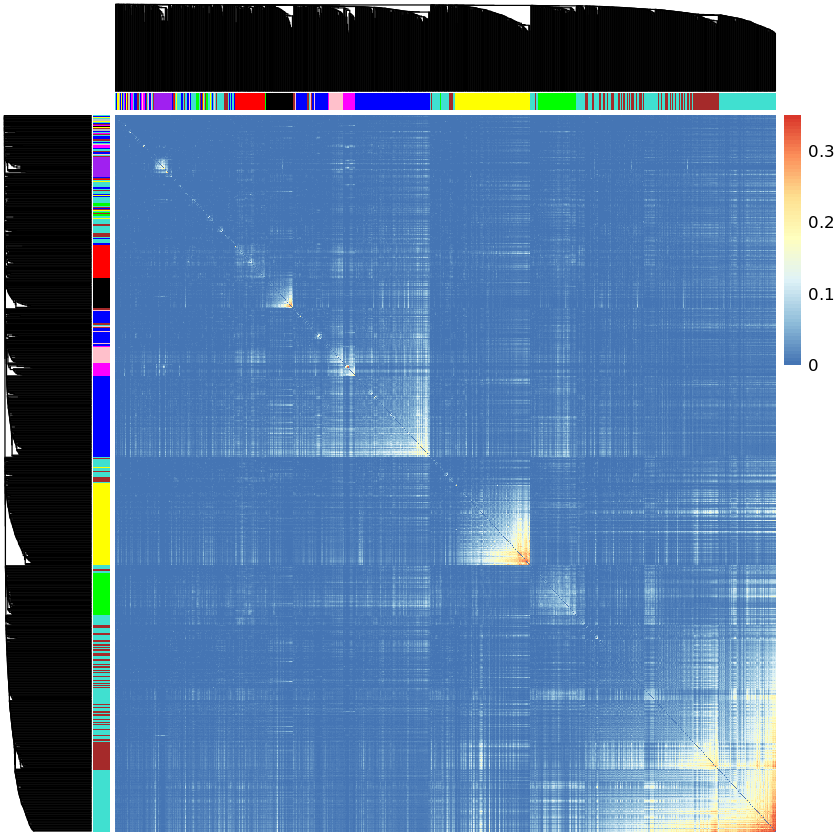

In [8]:
hm <- pheatmap(
    tom_hm,
    cluster_rows = gene_tree,
    cluster_cols = gene_tree,
    show_rownames = FALSE,
    show_colnames = FALSE,
    annotation_row = module_annot,
    annotation_names_row = FALSE,
    annotation_col = module_annot,
    annotation_colors = module_annot_colors,
    annotation_names_col = FALSE,
    annotation_legend = FALSE,
    color = pal,
    breaks = break_list,
    legend_breaks = hm_breaks,
    legend_labels = hm_labels,
#     treeheight_row = 25,
#     treeheight_col = 25,
)
hm$gtable$grobs[[1]]$gp <- gpar(lwd = 0.25)
hm$gtable$grobs[[2]]$gp <- gpar(lwd = 0.25)
# hm
# ggsave(paste0(dirs$figures_dir, "/network/", unified_dsets[dset_idx], "_TOM_heatmap.png"), as.ggplot(hm))


In [9]:
# Adapted from: 
n_largest <- function(m, n) {
    res <- order(m, decreasing = TRUE)[seq_len(n) * 2]
    pos <- arrayInd(res, dim(m), useNames = TRUE)
    return(
        list(values = m[res], rows = pos[, "row"], cols = pos[, "col"])
    )
}


In [10]:
n_lg <- n_largest(tom_hm, 10)
# n_lg_rows <- n_lg$position[, "row"]
# n_lg_cols <- n_lg$position[, "col"]

In [11]:
mean(rowSums(tom_hm))

[1] 16.38675

In [13]:
tom_hm[n_lg$rows, n_lg$cols]

,COL3A1,COL3A1,COL1A2,COL1A1,REG1B,COL3A1,COL3A1,COL3A1,COL3A1,COL1A1
COL1A2,0.340807038,0.340807038,0.000000000,0.327506779,0.003490374,0.340807038,0.340807038,0.340807038,0.340807038,0.327506779
COL1A1,0.339911241,0.339911241,0.327506779,0.000000000,0.003327912,0.339911241,0.339911241,0.339911241,0.339911241,0.000000000
COL6A3,0.329180130,0.329180130,0.333087652,0.332048389,0.004102247,0.329180130,0.329180130,0.329180130,0.329180130,0.332048389
COL6A3,0.329180130,0.329180130,0.333087652,0.332048389,0.004102247,0.329180130,0.329180130,0.329180130,0.329180130,0.332048389
REG3G,0.003161746,0.003161746,0.002717851,0.002592367,0.329252371,0.003161746,0.003161746,0.003161746,0.003161746,0.002592367
COL6A3,0.329180130,0.329180130,0.333087652,0.332048389,0.004102247,0.329180130,0.329180130,0.329180130,0.329180130,0.332048389
ADAMTS2,0.328166805,0.328166805,0.313687581,0.314268021,0.003444049,0.328166805,0.328166805,0.328166805,0.328166805,0.314268021
COL10A1,0.327709020,0.327709020,0.318294720,0.317852770,0.002282385,0.327709020,0.327709020,0.327709020,0.327709020,0.317852770
THBS2,0.327628501,0.327628501,0.314788851,0.314992339,0.003078801,0.327628501,0.327628501,0.327628501,0.327628501,0.314992339
COL1A2,0.340807038,0.340807038,0.000000000,0.327506779,0.003490374,0.340807038,0.340807038,0.340807038,0.340807038,0.327506779
